In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from imblearn.over_sampling import SMOTE
from collections import Counter
sns.set(style='whitegrid')

In [187]:
# Cargar el dataset
df = pd.read_csv("../data/students_stress_level.csv")

In [188]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [189]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_

In [190]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


In [191]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [192]:
# Mostrar media y mediana de las características numéricas
print("Media de las características numéricas:")
print(df.select_dtypes(include=[np.number]).mean())

print("\nMediana de las características numéricas:")
print(df.select_dtypes(include=[np.number]).median())

Media de las características numéricas:
anxiety_level                   11.063636
self_esteem                     17.777273
mental_health_history            0.492727
depression                      12.555455
headache                         2.508182
blood_pressure                   2.181818
sleep_quality                    2.660000
breathing_problem                2.753636
noise_level                      2.649091
living_conditions                2.518182
safety                           2.737273
basic_needs                      2.772727
academic_performance             2.772727
study_load                       2.621818
teacher_student_relationship     2.648182
future_career_concerns           2.649091
social_support                   1.881818
peer_pressure                    2.734545
extracurricular_activities       2.767273
bullying                         2.617273
stress_level                     0.996364
dtype: float64

Mediana de las características numéricas:
anxiety_level       

In [193]:
# Mostrar la varianza y desviación estándar de las características numéricas
print("Varianza de las características numéricas:")
print(df.select_dtypes(include=[np.number]).var())

print("\nDesviación estándar de las características numéricas:")
print(df.select_dtypes(include=[np.number]).std())

Varianza de las características numéricas:
anxiety_level                   37.424518
self_esteem                     80.005852
mental_health_history            0.250175
depression                      59.706658
headache                         1.986284
blood_pressure                   0.694847
sleep_quality                    2.397489
breathing_problem                1.961998
noise_level                      1.763921
living_conditions                1.252626
safety                           1.977317
basic_needs                      2.055670
academic_performance             2.001075
study_load                       1.731280
teacher_student_relationship     1.917058
future_career_concerns           2.338989
social_support                   1.097940
peer_pressure                    2.031381
extracurricular_activities       2.009483
bullying                         2.343832
stress_level                     0.675146
dtype: float64

Desviación estándar de las características numéricas:
anxie

In [194]:
# Mostrar valores nulos de cada columna
print("Conteo de valores nulos por columna:")
df.isnull().sum()

Conteo de valores nulos por columna:


anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [195]:
# Seleccionar las columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", numerical_columns)

# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

Columnas numéricas: Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')
Columnas categóricas: Index([], dtype='object')


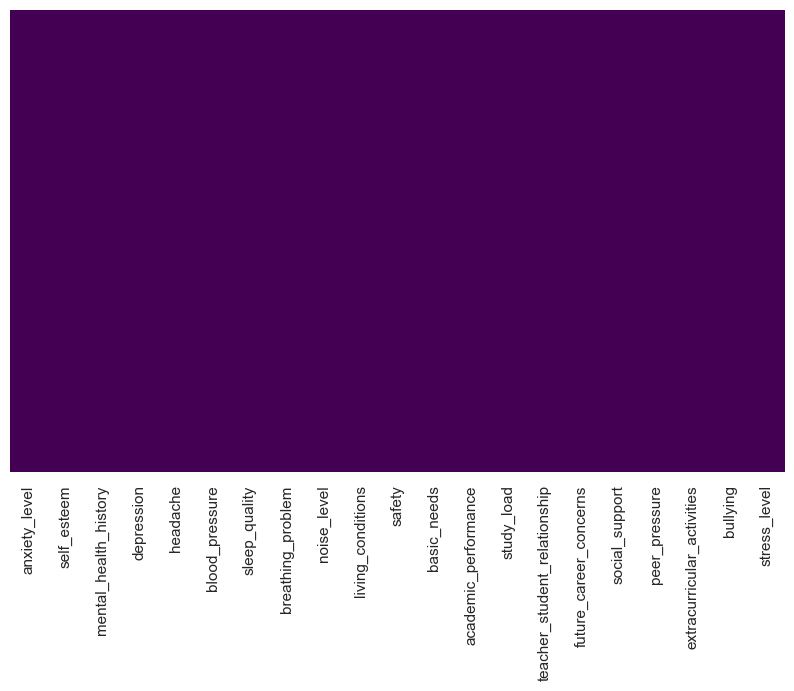

In [196]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [197]:
# Calcular las puntuaciones compuestas para cada categoría
Psychological_Score = (df['anxiety_level'] + df['self_esteem']) / 2
Environmental_Score = (df['noise_level'] + df['living_conditions'] + df['safety'] + df['basic_needs']) / 4
Academic_Score = (df['academic_performance'] + df['study_load'] + df['teacher_student_relationship']) / 3
Social_Score = (df['social_support'] + df['peer_pressure'] + df['extracurricular_activities'] + df['bullying']) / 4
Physiological_Score = (df['headache'] + df['sleep_quality'] + df['breathing_problem']) / 3

df_cleaned = df.copy()
# Añadir las nuevas columnas al DataFrame
df_cleaned['Psychological_Score'] = Psychological_Score
df_cleaned['Environmental_Score'] = Environmental_Score
df_cleaned['Academic_Score'] = Academic_Score
df_cleaned['Social_Score'] = Social_Score
df_cleaned['Physiological_Score'] = Physiological_Score

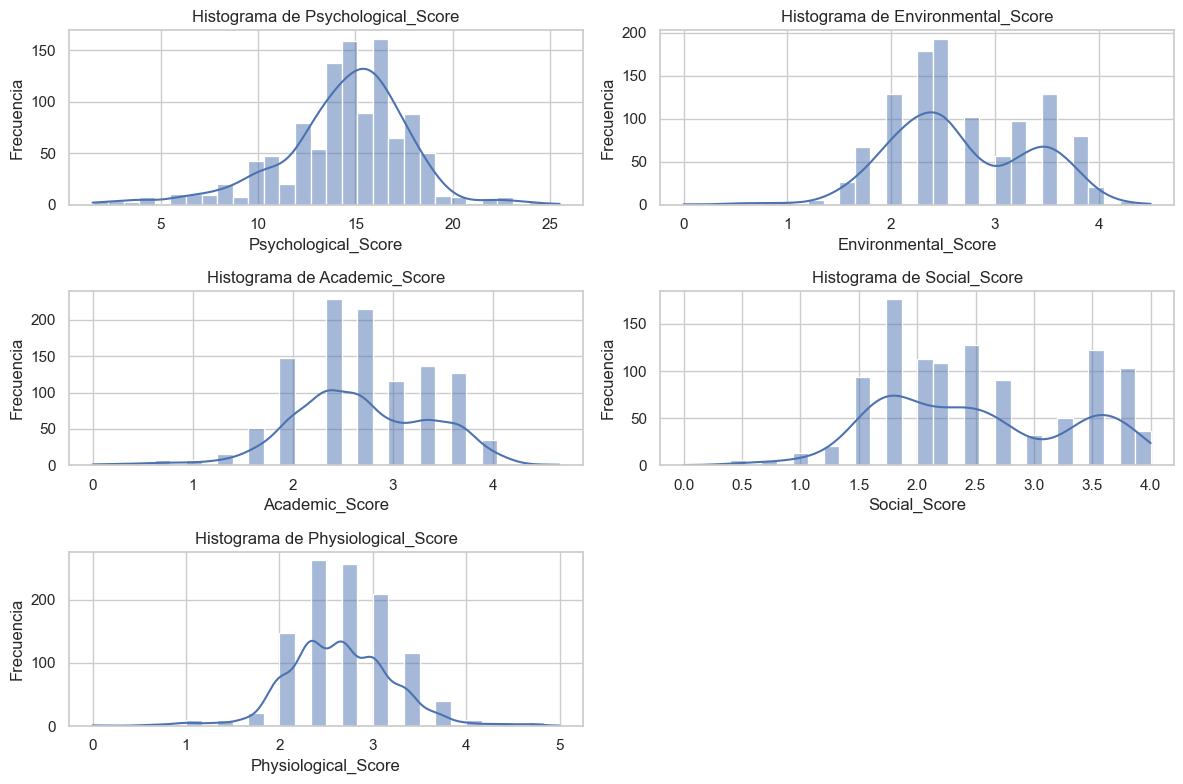

In [198]:
# Histograma de las puntuaciones compuestas

selected_features = [
    'Psychological_Score',
    'Environmental_Score',
    'Academic_Score',
    'Social_Score',
    'Physiological_Score'
]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_cleaned[feature], kde=True, bins=30)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
  
plt.tight_layout()
plt.show()

In [199]:
# Detectar valores atípicos en el las variables numéricas

for col in selected_features:
  Q1 = df_cleaned[col].quantile(0.25)
  Q3 = df_cleaned[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

  print(f"Cantidad de valores atípicos en {col}: {len(outliers)}")

Cantidad de valores atípicos en Psychological_Score: 64
Cantidad de valores atípicos en Environmental_Score: 4
Cantidad de valores atípicos en Academic_Score: 15
Cantidad de valores atípicos en Social_Score: 0
Cantidad de valores atípicos en Physiological_Score: 39


In [200]:
# Tratar los valores atípicos eliminándolos para las variables compuestas

for col in selected_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar outliers: {len(df_cleaned)}")

Filas originales: 1100
Filas después de eliminar outliers: 996


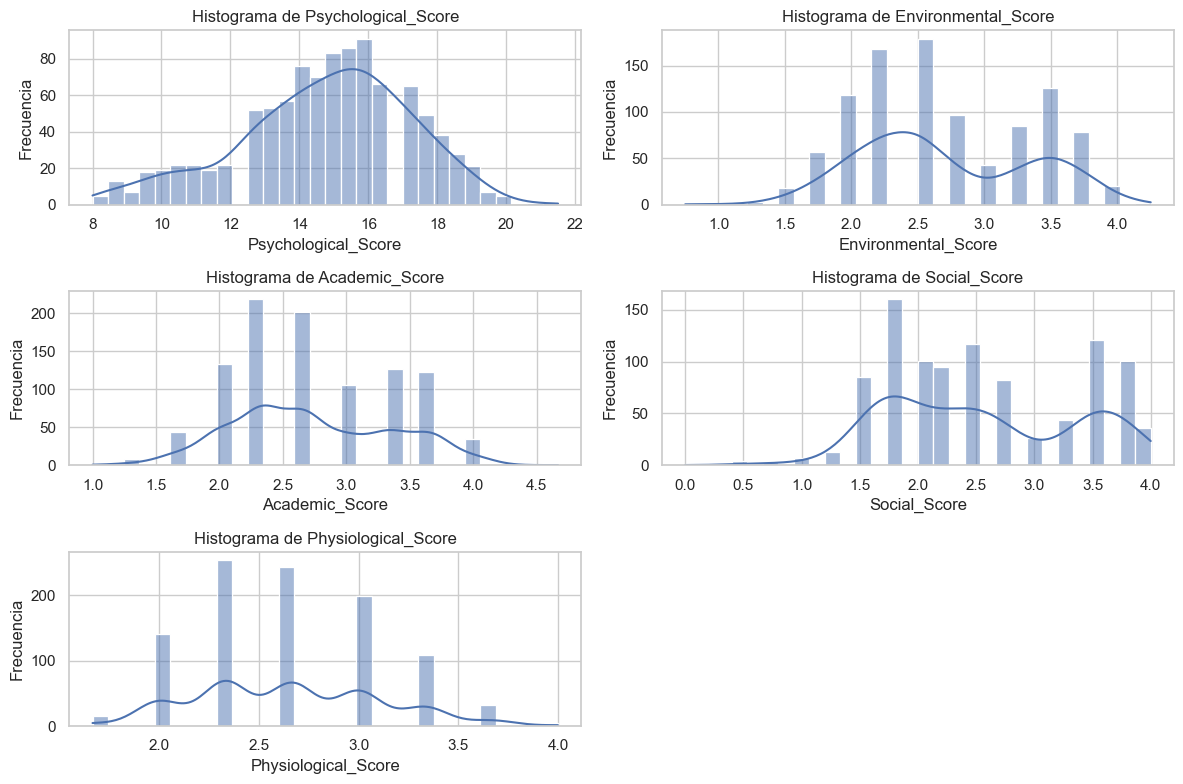

In [201]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_cleaned[feature], kde=True, bins=30)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
  
plt.tight_layout()
plt.show()

Distribución original de las clases: Counter({0: 339, 1: 332, 2: 325})
Distribución después de SMOTE: Counter({1: 339, 2: 339, 0: 339})


C:\Users\juanl\AppData\Local\Temp\ipykernel_19176\3091008090.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')
C:\Users\juanl\AppData\Local\Temp\ipykernel_19176\3091008090.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette='viridis')


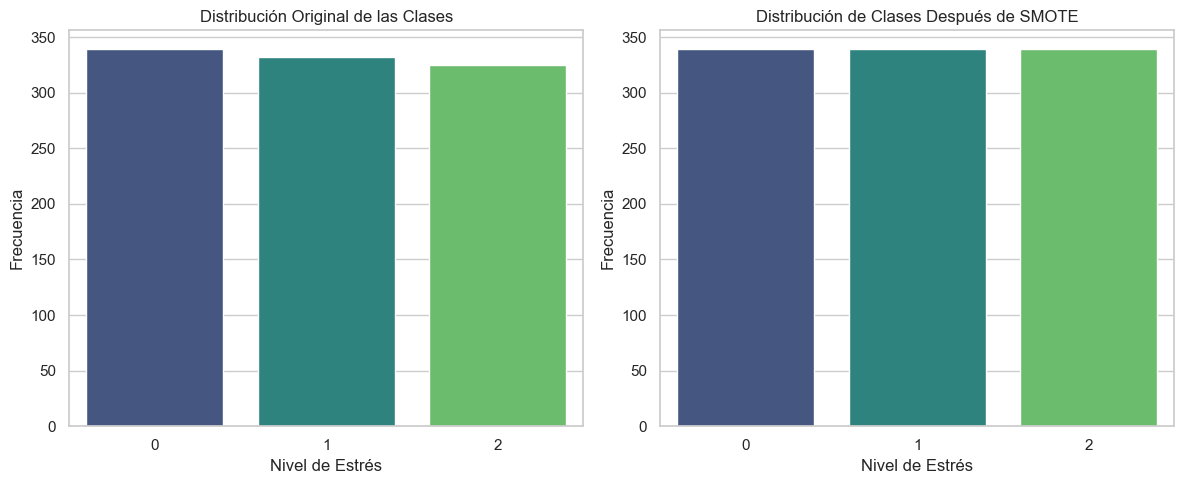

In [202]:
# Aplicar smote para balancear las clases de la variable objetivo
X = df_cleaned.drop(columns=['stress_level'])
y = df_cleaned['stress_level']

# Aplicar SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

# Mostrar la distribución antes y después de SMOTE
print("Distribución original de las clases:", Counter(y))
print("Distribución después de SMOTE:", Counter(y_balanced))


# Visualizar la nueva distribución
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='viridis')
plt.title('Distribución Original de las Clases')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.countplot(x=y_balanced, palette='viridis')
plt.title('Distribución de Clases Después de SMOTE')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [203]:
# Transformar variables categoricas en variables dummy
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

In [204]:
# Mostrar información del DataFrame después de eliminar outliers
print("Información del DataFrame:")
df_cleaned.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 1099
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anxiety_level                 996 non-null    int64  
 1   self_esteem                   996 non-null    int64  
 2   mental_health_history         996 non-null    int64  
 3   depression                    996 non-null    int64  
 4   headache                      996 non-null    int64  
 5   blood_pressure                996 non-null    int64  
 6   sleep_quality                 996 non-null    int64  
 7   breathing_problem             996 non-null    int64  
 8   noise_level                   996 non-null    int64  
 9   living_conditions             996 non-null    int64  
 10  safety                        996 non-null    int64  
 11  basic_needs                   996 non-null    int64  
 12  academic_performance          996 non-nul

In [205]:
# Mostrar estadísticas descriptivas generales después de eliminar outliers
print("Estadísticas descriptivas generales:")
df_cleaned.describe()

Estadísticas descriptivas generales:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,Psychological_Score,Environmental_Score,Academic_Score,Social_Score,Physiological_Score
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,...,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,11.143574,18.340361,0.493976,12.557229,2.503012,2.096386,2.666667,2.776104,2.665663,2.525100,...,2.019076,2.764056,2.783133,2.618474,0.985944,14.741968,2.698544,2.737617,2.546185,2.648594
std,6.082058,8.666554,0.500215,7.680801,1.353570,0.830782,1.502873,1.353600,1.275854,1.049706,...,0.993768,1.380974,1.377185,1.500090,0.816786,2.492136,0.653114,0.633239,0.819211,0.464613
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.750000,1.000000,0.000000,1.666667
25%,6.000000,12.000000,0.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,0.000000,13.000000,2.250000,2.333333,1.750000,2.333333
50%,11.000000,20.000000,0.000000,12.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,3.000000,1.000000,15.000000,2.500000,2.666667,2.500000,2.666667
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,2.000000,16.500000,3.250000,3.333333,3.500000,3.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,5.000000,5.000000,5.000000,2.000000,21.500000,4.250000,4.666667,4.000000,4.000000


In [206]:
# Mostrar media y mediana de las características numéricas después de eliminar outliers
print("Media de las características numéricas:")
print(df_cleaned.select_dtypes(include=[np.number]).mean())

print("\nMediana de las características numéricas:")
print(df_cleaned.select_dtypes(include=[np.number]).median())

Media de las características numéricas:
anxiety_level                   11.143574
self_esteem                     18.340361
mental_health_history            0.493976
depression                      12.557229
headache                         2.503012
blood_pressure                   2.096386
sleep_quality                    2.666667
breathing_problem                2.776104
noise_level                      2.665663
living_conditions                2.525100
safety                           2.787149
basic_needs                      2.816265
academic_performance             2.816265
study_load                       2.657631
teacher_student_relationship     2.738956
future_career_concerns           2.641566
social_support                   2.019076
peer_pressure                    2.764056
extracurricular_activities       2.783133
bullying                         2.618474
stress_level                     0.985944
Psychological_Score             14.741968
Environmental_Score              2.6

In [207]:
# Mostrar la varianza y desviación estándar de las características numéricas después de eliminar outliers
print("Varianza de las características numéricas:")
print(df_cleaned.select_dtypes(include=[np.number]).var())

print("\nDesviación estándar de las características numéricas:")
print(df_cleaned.select_dtypes(include=[np.number]).std())

Varianza de las características numéricas:
anxiety_level                   36.991426
self_esteem                     75.109163
mental_health_history            0.250215
depression                      58.994712
headache                         1.832152
blood_pressure                   0.690198
sleep_quality                    2.258626
breathing_problem                1.832232
noise_level                      1.627805
living_conditions                1.101882
safety                           1.912438
basic_needs                      1.957162
academic_performance             1.904901
study_load                       1.533922
teacher_student_relationship     1.843345
future_career_concerns           2.308582
social_support                   0.987575
peer_pressure                    1.907089
extracurricular_activities       1.896640
bullying                         2.250271
stress_level                     0.667139
Psychological_Score              6.210739
Environmental_Score              

In [208]:
# Guardar los datos preprocesados
df_cleaned.to_csv("../data/students_stress_level_cleaned.csv", index=False)
print("Datos preprocesados guardados en 'students_stress_level_cleaned.csv'")

Datos preprocesados guardados en 'students_stress_level_cleaned.csv'
